--- Setup & Load Data ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fake= pd.read_csv('C://Users//User//Desktop//jobs//Tony Blair//archive (10)//Fake.csv')
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
df_true= pd.read_csv('C://Users//User//Desktop//jobs//Tony Blair//archive (10)//True.csv')
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


--- Preparation & Labeling ---

    Prepare the dataset for binary classification:
    - We assign a label of '0' to all fake articles and '1' to all real articles
    - We concatenate the 'title' and 'text' fields into a new column called 'full' to use as our input feature
    - We retain only the relevant columns: 'full', 'subject', and 'label
    - Finally, we concatenate the fake and real datasets into a single DataFrame for unified processing

    This results in a dataset of 44,898 articles

In [6]:
df_fake['label']= 0
df_true['label'] = 1

In [7]:
df= pd.concat([df_fake, df_true], ignore_index= True)
df['full']= df['title'] + ' ' + df['text']
df= df[['full', 'subject', 'label']]

In [8]:
df

,full,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,0
4,Pope Francis Just Called Out Donald Trump Dur...,News,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,worldnews,1
44894,LexisNexis withdrew two products from Chinese ...,worldnews,1
44895,Minsk cultural hub becomes haven from authorit...,worldnews,1
44896,Vatican upbeat on possibility of Pope Francis ...,worldnews,1


--- Text Cleansing ---

    Prepare the text for vectorization

    - Applied a function 'preprocessing_pipeline' which:
        - Converts all text to lowercase
        - Removes multiple punctuation marks like "!!!" and "???"
        - Removes URLs (`http...`), hashtags (`#...`), and mentions (`@...`)
        - Strips all punctuation and digits
        - Normalizes excessive whitespace

    - Also, tested the function to confirm it works

In [9]:
import re
import string

def preprocessing_pipeline(text):
    text= text.lower().strip()

    text= re.sub(r'\!+', '!', text)
    text= re.sub(r'\?+', '?', text)

    text= ' '.join(word for word in text.split() if not word.startswith(('@', '#', 'http')))

    text= text.translate(str.maketrans('', '', string.punctuation))

    text= re.sub(r'\d+', '', text)

    text= re.sub(r'\s+', ' ', text)

    return text.strip()

In [10]:
preprocessing_pipeline("Breaking!!! Check this out: https://fakeurl.com/news @user123 #breaking123 100% True???")

'breaking check this out true'

In [11]:
df['full']= df['full'].apply(preprocessing_pipeline)

In [12]:
df['full']

0        donald trump sends out embarrassing new year’s...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes an internet joke ...
3        trump is so obsessed he even has obama’s name ...
4        pope francis just called out donald trump duri...
                               ...                        
44893    fully committed nato backs new us approach on ...
44894    lexisnexis withdrew two products from chinese ...
44895    minsk cultural hub becomes haven from authorit...
44896    vatican upbeat on possibility of pope francis ...
44897    indonesia to buy billion worth of russian jets...
Name: full, Length: 44898, dtype: object

--- Step 1 - Baseline ---

--- Split - Train/Test Sets ---

    Splited the dataset into training set (80%) and test set (20%), 
    stratifying on the 'label' column to ensure class balance in both sets

    Also, extracted the 'subject' column using: subj = df['subject']
    
    *This captures the domain or topic category of each article (e.g., "Politics", "News", "Middle-east", "WorldNews")
     We store it separately as subj_train and subj_test so that we can later:

     - Evaluate model performance per domain
     - Identify if the model performs better on certain topics
     - Use it as an additional feature in the final improvement step

In [13]:
from sklearn.model_selection import train_test_split

X= df['full']
y= df['label']

subj= df['subject']

X_train, X_test, y_train, y_test, subj_train, subj_test= train_test_split(
    X, y, subj, test_size= 0.2, stratify= y, random_state= 42)

--- TF-IDF Vectorization (convert text to numeric features) ---

    To convert the text data into numerical format for machine learning, 
    we applied TF-IDF (Term Frequency–Inverse Document Frequency) vectorization 

    Used the following parameters:
        - 'stop_words= 'english'': removes common words like "the", "and", etc.
        - 'max_df=0.8': ignores words that appear in more than 80% of documents
        
    Result:
        - Training set: (35,918 samples, 185,039 features)
        - Test set: (8,980 samples, 185,039 features)

    Also, checked the top TF-IDF weighted terms in the first few training documents 
    and visualized the distribution of document lengths.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(stop_words= 'english', max_df= 0.8)

X_train_vec= tfidf.fit_transform(X_train)
X_test_vec= tfidf.transform(X_test)

In [15]:
print(f"TF-IDF Train Matrix Shape: {X_train_vec.shape}")
print(f"TF-IDF Test Matrix Shape: {X_test_vec.shape}")

TF-IDF Train Matrix Shape: (35918, 185039)
TF-IDF Test Matrix Shape: (8980, 185039)


In [16]:
tfidf.get_feature_names_out()[:20]

array(['aa', 'aaa', 'aaaaackkk', 'aaaarrgh',
       'aaainnertextreplacernrngquotnquotelsevar', 'aaarf', 'aab', 'aaba',
       'aabo', 'aaccording', 'aadhaar', 'aadhar', 'aadl',
       'aadocumentmodevoid', 'aaf', 'aafunctionabforvar', 'aai', 'aaja',
       'aalberg', 'aaldef'], dtype=object)

In [17]:
tfidf_df= pd.DataFrame(X_train_vec[:5].toarray(), columns= tfidf.get_feature_names_out())
tfidf_df.T.sort_values(by= 0, ascending= False).head(10)

,0,1,2,3,4
nord,0.367433,0.0,0.0,0.0,0.0
du,0.350107,0.0,0.0,0.0,0.0
bank,0.309871,0.0,0.0,0.0,0.0
socgen,0.307549,0.0,0.0,0.0,0.0
generale,0.271861,0.0,0.0,0.0,0.0
societe,0.258985,0.0,0.0,0.0,0.0
account,0.240880,0.0,0.0,0.0,0.0
credit,0.199142,0.0,0.0,0.0,0.0
banking,0.157554,0.0,0.0,0.0,0.0
regulatory,0.155495,0.0,0.0,0.0,0.0


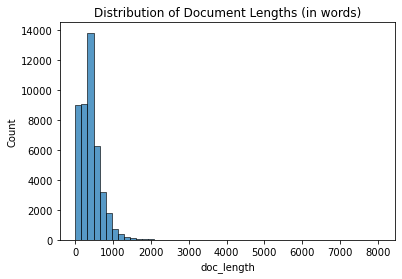

In [18]:
df['doc_length']= df['full'].apply(lambda x: len(x.split()))
sns.histplot(df['doc_length'], bins= 50)
plt.title("Distribution of Document Lengths (in words)")
plt.show()

--- LogisticRegression ---

    Begun with LR(Logistic Regression)

    Results - Evaluation Metrics:
        - Accuracy: 98.76%
            This shows that 99% of articles were classified correctly as either fake or real
            
        - Precision: 98.40%
            Out of all articles predicted as real, 98.4% were actually real.  
            This is important when false positives (e.g., labeling fake news as real) are costly
            
        - Recall: 99%
            Out of all actual real articles, 99% were correctly identified  
            This reflects how well the model catches all real news
            
        - F1 Score: 99%
            F1 balances both concerns and is especially useful when classes are imbalanced or 
            when we care equally about precision and recall
            
        - AUC: 0.9878
            Area Under the Receiver Operating Characteristic(ROC) Curve  
            AUC near 1.0 indicates the model can almost perfectly separate fake from real news 
            across all classification thresholds

    The confusion matrix shows strong performance on both fake and real classes, 
    with a small misclassification.

    These results show us that a basic linear classifier performs exceptionally well on this dataset,
    due to strong lexical differences between fake and real news articles.

In [19]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter= 1000)
lr.fit(X_train_vec, y_train)

y_pred= lr.predict(X_test_vec)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Precision: 0.9839944328462074
Accuracy: 0.9876391982182628
AUC: 0.9877513611918363


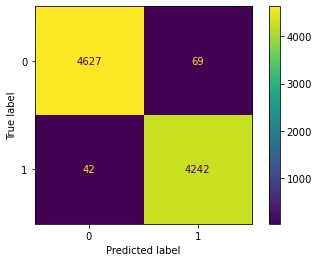

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, roc_auc_score, accuracy_score 

cm= confusion_matrix(y_test, y_pred, labels= lr.classes_)
print(classification_report(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))
dcm_lr= ConfusionMatrixDisplay(cm, display_labels= lr.classes_)
dcm_lr.plot()

--- Evaluation by Domain (subject) ---

    To understand how the model performs across different news domains, 
    we evaluated accuracy, precision, recall, and F1-score separately for each value 
    of the 'subject' field (e.g., "Politics", "News", "WorldNews")

    Grouped predictions by domain using a DataFrame that combined:
        - 'subject' (domain)
        - 'true' labels
        - 'pred' labels

    During stratified train/test splitting, 
    some domains such as PoliticsNews, WorldNews, and Left-News 
    contain only one class(all real or all fake) in the test set

    Result:
        - The model cannot predict the missing class
        - Metrics like precision, recall, and F1 for that class are undefined and default to 0.0
        - This probably is not a model issue, but a reflection of class imbalance within specific domains


    Despite the class imbalance in some domains, the model maintained very high performance 
    wherever both classes were present
    This means that while the model generalizes well, domain diversity and label balance
    should be considered in future dataset preparation.

In [21]:
df_eval= pd.DataFrame({'subject': subj_test,
                       'true': y_test,
                       'pred': y_pred
                      })

from sklearn.metrics import classification_report

for domain in df_eval['subject'].unique():
    print(f"\n--- {domain.upper()} ---")
    d= df_eval[df_eval['subject']== domain]
    print(classification_report(d['true'], d['pred'], zero_division= 0))


--- POLITICSNEWS ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99      2196

    accuracy                           0.98      2196
   macro avg       0.50      0.49      0.50      2196
weighted avg       1.00      0.98      0.99      2196


--- NEWS ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1771
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1771
   macro avg       0.50      0.50      0.50      1771
weighted avg       1.00      1.00      1.00      1771


--- WORLDNEWS ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00      2088

    accuracy                           1.00      2088
   macro avg       0.50      0.50      0.50      2088
weighted avg       

--- Feature Importance (Top Words) ---

    To understand how LR model makes decisions, extracted and visualized 
    the most influential words based on the model's learned coefficients.

    Each word's weight (positive or negative) indicates how strongly 
    it contributes to predicting an article as real or fake:
            - Positive weights -> push the prediction toward real news
            - Negative weights -> push the prediction toward fake news

    Visualized the top 20 most influential features and
    sorted by the absolute value of their coefficients.

    - Words like "reuters", "said", and weekday names(e.g., wednesday, tuesday) are strongly 
      associated with real news
      
    - Words like "video", "just", "hillary", and "gop" are 
      associated with fake news

In [22]:
feat_names= tfidf.get_feature_names_out()
coef= lr.coef_[0]

In [23]:
feat_df= pd.DataFrame({'feature': feat_names,
                           'weight': coef
                          })

top_feat= feat_df.reindex(np.argsort(np.abs(feat_df['weight']))[::-1]).head(20)

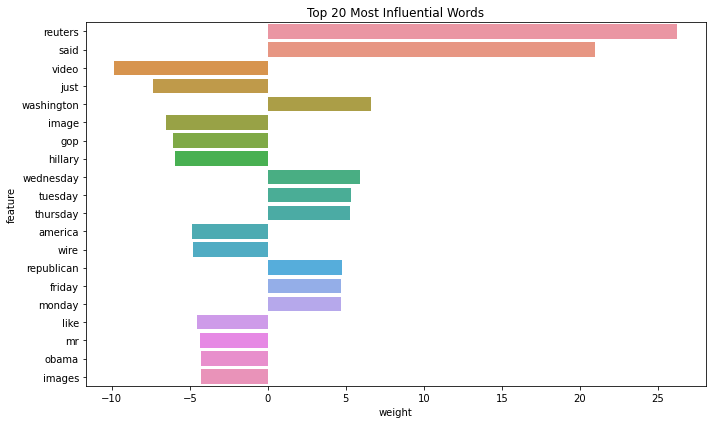

In [24]:
plt.figure(figsize= (10, 6))
sns.barplot(data= top_feat, x= 'weight', y= 'feature')
plt.title('Top 20 Most Influential Words')
plt.tight_layout()
plt.show()

In [25]:
print("Top 20 Most Influential Words (Ordered by Importance):\n")

for i, row in top_feat.iterrows():
    print(f"{i+1}. {row['feature']} (weight= {row['weight']:.4f})")

Top 20 Most Influential Words (Ordered by Importance):

137694. reuters (weight= 26.2478)
141572. said (weight= 20.9961)
174688. video (weight= -9.8488)
83306. just (weight= -7.3496)
177157. washington (weight= 6.6200)
74875. image (weight= -6.5526)
63805. gop (weight= -6.0835)
70667. hillary (weight= -5.9564)
178175. wednesday (weight= 5.9231)
168907. tuesday (weight= 5.3618)
164138. thursday (weight= 5.2882)
6305. america (weight= -4.8351)
180472. wire (weight= -4.7705)
136419. republican (weight= 4.7597)
59836. friday (weight= 4.7115)
101028. monday (weight= 4.6910)
90452. like (weight= -4.5069)
102614. mr (weight= -4.3549)
109632. obama (weight= -4.2888)
74903. images (weight= -4.2585)


In [26]:
top_words= top_feat['feature'].tolist()
print(top_words)

['reuters', 'said', 'video', 'just', 'washington', 'image', 'gop', 'hillary', 'wednesday', 'tuesday', 'thursday', 'america', 'wire', 'republican', 'friday', 'monday', 'like', 'mr', 'obama', 'images']


--- Top Predictors of Real News (positive weights) ----

In [27]:
top_feat= top_feat.reset_index(drop= True)

top_real= top_feat[top_feat['weight'] > 0].sort_values(by= 'weight', ascending= False)

print("Words that strongly indicate **Real** news:\n")
for i, row in top_real.iterrows():
    print(f"{row['feature']} (weight= {row['weight']:.4f})")

Words that strongly indicate **Real** news:

reuters (weight= 26.2478)
said (weight= 20.9961)
washington (weight= 6.6200)
wednesday (weight= 5.9231)
tuesday (weight= 5.3618)
thursday (weight= 5.2882)
republican (weight= 4.7597)
friday (weight= 4.7115)
monday (weight= 4.6910)


--- Top Predictors of Fake News (negative weights) ---

In [28]:
top_fake= top_feat[top_feat['weight'] < 0].sort_values(by= 'weight')

print("\nWords that strongly indicate **Fake** news:\n")
for i, row in top_fake.iterrows():
    print(f"{row['feature']} (weight= {row['weight']:.4f})")


Words that strongly indicate **Fake** news:

video (weight= -9.8488)
just (weight= -7.3496)
image (weight= -6.5526)
gop (weight= -6.0835)
hillary (weight= -5.9564)
america (weight= -4.8351)
wire (weight= -4.7705)
like (weight= -4.5069)
mr (weight= -4.3549)
obama (weight= -4.2888)
images (weight= -4.2585)


--- Step 2 - Improvement ---

--- Improvement 1 – TF-IDF with Bigrams ---

    We tried to enhanced the TF-IDF vectorizer by including bigrams('ngram_range=(1, 2)'), 
    which allows the model to consider two-word phrases like:
        - "donald trump"
        - "white house"
        - "fake news"

    Results - Evaluation(LR with Bigrams):

        - Accuracy (98.71%):  
              The overall proportion of correctly predicted articles nearly 99% of predictions were correct

        - Precision (98.22%):  
              Of all the articles predicted as real, 98.22% were actually real 
  
        - Recall (99%):  
              Out of all actual real news articles, 99% were correctly identified  
              This shows how well the model captures true positives

        - F1 Score (99%):  
              A high F1 score indicates strong, consistent performance across both classes

        - AUC (0.9872):  
              AUC close to 1 means near-perfect separability


    While bigrams help capture multi-word expressions that may signal credibility or bias, 
    the overall performance remained close to the unigram-based baseline
    This indicates that the dataset is already highly separable using unigrams alone

In [29]:
tfidf_bigram= TfidfVectorizer(stop_words= 'english',
                              max_df= 0.8,
                              ngram_range= (1, 2)
                             )

X_train_vec_bigram= tfidf_bigram.fit_transform(X_train)
X_test_vec_bigram= tfidf_bigram.transform(X_test)

Classification Report (LogReg with Bigrams):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Precision: 0.9821841739935215
Accuracy: 0.9870824053452116
AUC: 0.9872497124914702


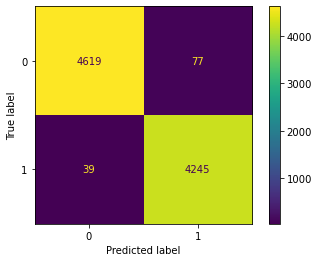

In [30]:
lr_bigram= LogisticRegression(max_iter= 1000)
lr_bigram.fit(X_train_vec_bigram, y_train)

y_pred_bigram= lr_bigram.predict(X_test_vec_bigram)

cm_bigram= confusion_matrix(y_test, y_pred_bigram, labels= lr_bigram.classes_)

print("Classification Report (LogReg with Bigrams):")
print(classification_report(y_test, y_pred_bigram))
print('Precision:', precision_score(y_test, y_pred_bigram))
print('Accuracy:', accuracy_score(y_test, y_pred_bigram))
print('AUC:', roc_auc_score(y_test, y_pred_bigram))

disp_bigram= ConfusionMatrixDisplay(cm_bigram, display_labels= lr_bigram.classes_)
disp_bigram.plot()

---  Improvement 2 – XGBoost ---

    We trained an XGBoost classifier, a powerful tree-based ensemble model known 
    for its robustness, high performance, and ability to handle 
    sparse data well — such as our TF-IDF matrix

    XGBoost is a non-linear model, which allows it to capture complex relationships 
    in the data that linear models like Logistic Regression may miss

    Results - Evaluation (XGBoost on Unigram TF-IDF):

        - Accuracy (99.78%):  
              Nearly all articles were correctly classified, showing a strong model fit

        - Precision (99.79%):  
              Of all predicted real news articles, 99.79% were correct, indicating very low false positives

        - Recall (100%):  
              The model successfully identified all real news articles in the test set meaning zero false negatives

        - F1 Score (1.00):  
              Perfect balance between precision and recall

        - AUC (0.9978):  
              The ROC-AUC score shows near-perfect class separability across thresholds


    XGBoost significantly outperformed both Logistic Regression models

    This shows us that non-linear, tree-based models are highly effective
    in detecting fake news, even when working with high-dimensional, sparse TF-IDF features

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Precision: 0.9978981784212985
Accuracy: 0.9977728285077951
AUC: 0.9977578907769808


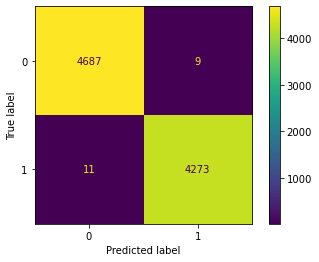

In [31]:
from xgboost import XGBClassifier

xgb= XGBClassifier(use_label_encoder= False, eval_metric= 'logloss', random_state= 42)
xgb.fit(X_train_vec, y_train)

y_pred_xgb= xgb.predict(X_test_vec)

cm_xgb= confusion_matrix(y_test, y_pred_xgb, labels= xgb.classes_)

print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print('Precision:', precision_score(y_test, y_pred_xgb))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('AUC:', roc_auc_score(y_test, y_pred_xgb))

disp_xgb= ConfusionMatrixDisplay(cm_xgb, display_labels= xgb.classes_)
disp_xgb.plot()

--- Final Improvement ---

    Finally we tried to enhanced our feature set by including domain metadata ('subject' column) 
    with the TF-IDF text features

    We used:
        - One-hot encoding for the 'subject' field (e.g., Politics, WorldNews, US_News)
        - Combined it with the sparse TF-IDF matrix using 'scipy.sparse.hstack'

    Then we trained a LR model on the combined feature matrix

    Results - Evaluation (LogReg + TF-IDF + 'subject'):

        - Accuracy (100%):  
              Every article in the test set was correctly classified

        - Precision (1.0):  
              All articles predicted as real were truly real

        - Recall (1.0):  
              All real news articles were correctly captured — no false negatives

        - F1 Score (1.0):  
              Perfect balance between precision and recall.

        - AUC (1.0):  
              The model achieved perfect separability between fake and real news.

    What does that mean in real world:

        While these results are impressive, such perfect performance in 
        real-world datasets is rare and may indicate:
            - Data leakage or Overfitting 
            - Strong correlation between the 'subject' and the label, allowing the model 
                to "shortcut" classification without relying solely on article content

    This doesn't invalidate the result, it emphasizes the importance of understanding 
    feature interactions and validating models on truly unseen or diverse data


    By combining textual and categorical metadata, we were able to build a highly accurate and interpretable model
    This shows how integrating multiple data sources can significantly enhance model performance in NLP tasks

In [34]:
from sklearn.preprocessing import OneHotEncoder

enc= OneHotEncoder(handle_unknown= 'ignore', sparse= True)
subj_train_enc= enc.fit_transform(subj_train.values.reshape(-1, 1))
subj_test_enc= enc.transform(subj_test.values.reshape(-1, 1))

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report (LogReg + Subject):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Precision: 1.0
Accuracy: 1.0
AUC: 1.0


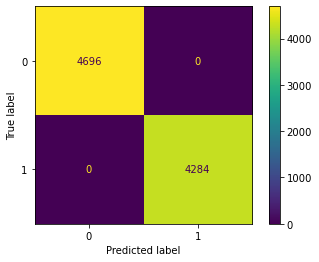

In [35]:
from scipy.sparse import hstack

X_train_comb= hstack([X_train_vec, subj_train_enc])
X_test_comb= hstack([X_test_vec, subj_test_enc])

lr_comb= LogisticRegression(max_iter= 1000)
lr_comb.fit(X_train_comb, y_train)

y_pred_comb= lr_comb.predict(X_test_comb)

cm_comb= confusion_matrix(y_test, y_pred_comb, labels=lr_comb.classes_)

print("Classification Report (LogReg + Subject):")
print(classification_report(y_test, y_pred_comb))
print('Precision:', precision_score(y_test, y_pred_comb))
print('Accuracy:', accuracy_score(y_test, y_pred_comb))
print('AUC:', roc_auc_score(y_test, y_pred_comb))

disp_comb= ConfusionMatrixDisplay(cm_comb, display_labels= lr_comb.classes_)
disp_comb.plot()